This notebook is for the Kaggle contest to determine whether a tweet is a danger or not

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Above this we will import all the libraries

In [9]:
train_df = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\NLP\train.csv")
test_df = pd.read_csv(r"C:\Users\varun\Desktop\Udacity\NLP\test.csv")
print(train_df.shape)
print(test_df.shape)

(7613, 5)
(3263, 4)


In [10]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
test_df.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

Keyword might be included since the number of missing entry is lesser than the actual entries

Data cleaning is the first and foremost thing here
• Removing Hashtags
• Removing the website links 
• Removing words like coool and other stuff

In [10]:
def lowercase_text(text):
    text = text.lower()
    return text
train_df['text'] = train_df['text'].apply(lambda x: lowercase_text(x))
test_df['text'] = test_df['text'].apply(lambda x: lowercase_text(x))
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


In [11]:
def remove_noise(text):
    # Dealing with Punctuation
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [12]:
train_df['text'] = train_df['text'].apply(lambda x: remove_noise(x))
test_df['text'] = test_df['text'].apply(lambda x: remove_noise(x))
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


In [13]:
sw = stopwords.words('english')

In [14]:
def stop_words_del(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in sw]
    filtered_sentence = (" ").join(tokens_without_sw)
    return filtered_sentence

train_df['text'] = train_df['text'].apply(lambda x: stop_words_del(x))
test_df['text'] = test_df['text'].apply(lambda x: stop_words_del(x))
print(stop_words_del('lets have fun in one'))

lets fun one


In [17]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,resid ask shelter place notifi offic evacu she...,1
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1


In [16]:
stemmer = SnowballStemmer('english')
def stemming(text):
    cor = [stemmer.stem(word) for word in text.split()]
    return ' '.join(cor)
train_df['text'] = train_df['text'].apply(lambda x: stemming(x))
test_df['text'] = test_df['text'].apply(lambda x: stemming(x))

Now that we are done with the data cleaning part we can move over to classification techniques applied.

In [61]:
count_vectorizer = CountVectorizer(analyzer='word', binary=True,ngram_range=(1,2))
train_vectors = count_vectorizer.fit_transform(train_df['text'])
test_vectors = count_vectorizer.transform(test_df['text'])

In [57]:
#building another vectors set
vectorizer = TfidfVectorizer(analyzer = 'word')
train_vect = vectorizer.fit_transform(train_df['text'])
test_vect = vectorizer.transform(test_df['text'])

In [18]:
y = train_df['target']

Above this we have tried a single approach lets now build something upon it

Applying logistic regression

In [62]:
clf = LogisticRegression(C=1.0)
scores = cross_val_score(clf, train_vectors, y, cv=5, scoring="f1")
scores

array([0.59448819, 0.53071672, 0.59516129, 0.49897331, 0.6910299 ])

In [63]:
# Fitting a simple Logistic Regression on Counts
clf.fit(train_vectors, y)

LogisticRegression()

In [64]:
predictions = clf.predict(test_vectors)
output = pd.DataFrame({'id': test_df.id, 'target': predictions})
output.to_csv('my_submission_NLP_LR.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


For machine learning the best that i have achieved in 80.07 which i got after using ngram in count vectorizer and logistic regression technique

# Above this point Simple Machine learning and below this Deep Learning

In [66]:
vocab_size = 10000
embedding_dim = 16
max_length = 22
oov_tok = 'OOV'

In [67]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_df['text'])
word_index = tokenizer.word_index
print(len(word_index))

13694


In [68]:
sequences = tokenizer.texts_to_sequences(train_df['text'])
padded = pad_sequences(sequences, padding='post', maxlen = 22, truncating = 'post')
print(padded[0])
print(padded.shape)

[3637  471  206   88 1465 2871   19    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
(7613, 22)


In [69]:
test_sequences = tokenizer.texts_to_sequences(test_df['text'])
padded_test = pad_sequences(test_sequences, padding = 'post', maxlen = 22, truncating = 'post')
print(padded_test.shape)

(3263, 22)


In [70]:
#splitting the training data into validation set
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6090, 22)
(1523, 22)
(6090,)
(1523,)


In [72]:
#Building a model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 22, 16)            160000    
_________________________________________________________________
global_average_pooling1d_10  (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [73]:
num_epochs = 15
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

Train on 6090 samples, validate on 1523 samples
Epoch 1/15
6090/6090 [==============================] - 1s 120us/sample - loss: 0.6793 - acc: 0.5616 - val_loss: 0.6562 - val_acc: 0.5739
Epoch 2/15
6090/6090 [==============================] - 0s 62us/sample - loss: 0.6020 - acc: 0.6760 - val_loss: 0.5550 - val_acc: 0.7505
Epoch 3/15
6090/6090 [==============================] - 0s 62us/sample - loss: 0.4500 - acc: 0.8327 - val_loss: 0.4598 - val_acc: 0.8050
Epoch 4/15
6090/6090 [==============================] - 0s 63us/sample - loss: 0.3268 - acc: 0.8762 - val_loss: 0.4528 - val_acc: 0.8043
Epoch 5/15
6090/6090 [==============================] - 0s 63us/sample - loss: 0.2643 - acc: 0.8974 - val_loss: 0.4728 - val_acc: 0.7879
Epoch 6/15
6090/6090 [==============================] - 0s 62us/sample - loss: 0.2240 - acc: 0.9172 - val_loss: 0.5003 - val_acc: 0.7800
Epoch 7/15
6090/6090 [==============================] - 0s 63us/sample - loss: 0.1898 - acc: 0.9304 - val_loss: 0.5313 - val_acc:

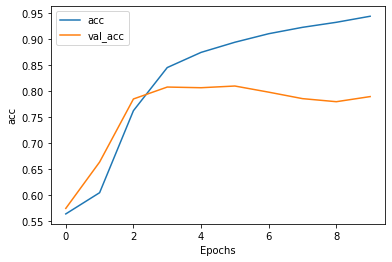

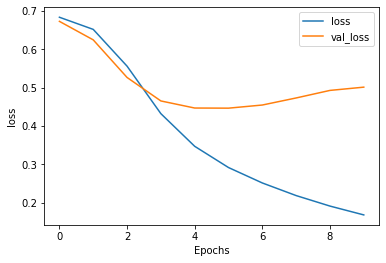

In [58]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [74]:
model.fit(padded,y, epochs = 4)

Epoch 1/4
7613/7613 [==============================] - 0s 53us/sample - loss: 0.2230 - acc: 0.9303
Epoch 2/4
7613/7613 [==============================] - 0s 49us/sample - loss: 0.1637 - acc: 0.9431
Epoch 3/4
7613/7613 [==============================] - 0s 49us/sample - loss: 0.1416 - acc: 0.9536
Epoch 4/4
7613/7613 [==============================] - 0s 50us/sample - loss: 0.1248 - acc: 0.9547


In [75]:
predictions = model.predict(padded_test)

In [77]:
data = np.where(predictions > .5, 1,0)

In [71]:
data.shape

(3263, 1)

In [78]:
df = pd.DataFrame(data = data)
df.head()

,0
0,1
1,1
2,1
3,1
4,1


In [79]:
output = pd.DataFrame({'id': test_df.id, 'target': df[0]})
output.to_csv('my_submission_NLP_DL.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
